# Hacktiv8 Phase 0: Graded Challenge 3

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Practical Statistics.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Kickstarter](https://i.imgur.com/mN5a9eh.png)

### Dataset

Data yang digunakan adalah dataset yang berisi project yang dikumpulkan dari [Kickstarter Platform](https://www.kickstarter.com/). Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv).

Kolom pada dataset cukup jelas, kecuali beberapa kolom berikut:

- usd pledged: hasil konversi dari kolom `pledged` dalam bentuk USD (konversi dilakukan oleh [Kickstarter](https://www.kickstarter.com/))
- usd_pledged_real: hasil konversi dari kolom `pledged` dalam bentuk USD (konversi dari [Fixer.io API](https://fixer.io/))
- usd_goal_real: hasil konversi dari kolom `goal` dalam bentuk USD (konversi dari [Fixer.io API](https://fixer.io/))

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini menggunakan **5** library yaitu **Pandas**, **NumPy**, **SciPy**, **Matplotlib**, dan **Seaborn**.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Membuat dataframe dari file `ks-projects-201801.csv`.

In [2]:
projects = pd.read_csv('dataset/ks-projects-201801.csv')

Melihat 5 baris teratas dari dataframe projects.

In [3]:
projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Data Characteristics

In [4]:
projects.shape

(378661, 15)

Dataset ini terdiri dari 378661 baris dan 15 kolom.

In [5]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Dataset ini terdiri dari:
- 5 kolom dengan tipe float
- 2 kolom dengan tipe integer
- 8 kolom dengan tipe object

kolom `deadline` dan `launched` nantinya akan diubah menjadi kolom dengan tipe data **datetime**.

In [6]:
projects.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


Dapat diketahui beberapa kolom memiliki distribusi yang tidak normal (asymmetric distribution). Sebagai contoh kolom `usd_pledged_real` memiliki distribusi **Right-Skewed** karena mean pada kolom tersebut lebih besar dari mediannya.

## Data Cleansing

### Missing Value

In [7]:
projects.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Terdapat **3797** missing value pada kolom `usd pledged`.

In [8]:
projects[projects['usd pledged'].isna()].groupby('state').ID.count().sort_values(ascending=False)

state
undefined     3562
successful     105
failed         105
canceled        22
suspended        2
live             1
Name: ID, dtype: int64

In [9]:
projects.groupby('state').ID.count().sort_values(ascending=False)

state
failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: ID, dtype: int64

Dari hasil pencarian missing value ini dapat dilihat seluruh baris yang berstatus **undefined** pada kolom `state` semuanya tidak memiliki value pada kolom `usd pledged`. Maka akan dilakukan penghapusan seluruh baris yang tidak memiliki value pada kolom `usd pledged`.

In [10]:
projects = projects.dropna()

In [11]:
projects.shape

(374860, 15)

In [12]:
projects.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [13]:
projects.groupby('state').ID.count().sort_values(ascending=False)

state
failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: ID, dtype: int64

Setelah dilakukan penghapusan baris yang memiliki missing value, sudah tidak ada lagi status **undefined** (tidak terdefinisi) pada kolom `state`.

### Column Drop

In [14]:
print(f'Number of unique value in category column: {projects.category.nunique()}')
print(f'Number of unique value in main_category column: {projects.main_category.nunique()}')

Number of unique value in category column: 159
Number of unique value in main_category column: 15


Karena jumlah `category` terlalu banyak, maka pada project ini hanya akan menggunakan kolom `main_category` saja. Kolom `goal` dan `pledged` pun sudah dikonversi dalam bentuk USD pada kolom `usd_goal_real` dan `usd_pledged_real` (hasil konversi menggunakan [Fixer.io API](https://fixer.io/)).

Maka kolom `category`, `currency`, `goal`, `pledged`, dan `usd pledged` akan dihilangkan.

In [15]:
projects = projects.drop(columns=['category', 'currency', 'goal', 'pledged', 'usd pledged'])
projects.head()

,ID,name,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


Setelah dilakukan penghapusan kolom sudah tidak ada lagi kolom `category`, `currency`, `goal`, `pledged`, dan `usd pledged`.

### Column Rename

Pada bagian ini akan dilakukan perubahan nama kolom dataframe untuk memudahkan pemanggilan kolom.

In [16]:
old_names = list(projects.columns) # Membuat list dari nama kolom dataframe
new_names = ['ID', 'name', 'category', 'deadline', 'launched', 'state', 'backers', 'country', 'pledged', 'goal'] # membuat list nama kolom baru untuk dataframe

Melakukan perubahan nama kolom dataframe.

In [17]:
projects = projects.rename(columns=dict(zip(old_names, new_names)))

Bentuk dataframe setelah dilakukan perubahan nama kolom.

In [18]:
projects.head()

,ID,name,category,deadline,launched,state,backers,country,pledged,goal
0,1000002330,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


## Data Preprocessing

Merubah kolom `deadline` dan `launched` kedalam bentuk datetime 

In [19]:
projects['deadline'] = pd.to_datetime(projects.deadline)
projects['launched'] = pd.to_datetime(projects.launched)

In [20]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ID        374860 non-null  int64         
 1   name      374860 non-null  object        
 2   category  374860 non-null  object        
 3   deadline  374860 non-null  datetime64[ns]
 4   launched  374860 non-null  datetime64[ns]
 5   state     374860 non-null  object        
 6   backers   374860 non-null  int64         
 7   country   374860 non-null  object        
 8   pledged   374860 non-null  float64       
 9   goal      374860 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 31.5+ MB


Setelah dilakukan perubahan tipe data pada kolom `deadline` dan `lauched` sekarang kolom tersebut memiliki tipe data datetime.

Membuat kolom baru `is_successful` yang akan bertipe boolean, dimana:
- **True** jika state sama dengan **successful** atau **live**.
- **False** jika state tidak sama dengan **successful** atau **live**.

In [21]:
projects['is_successful'] = projects.apply(lambda x: x.state == 'successful' or x.state == 'live', axis=1)

In [22]:
projects[(projects.state == 'successful') | (projects.state == 'live')].head()

,ID,name,category,deadline,launched,state,backers,country,pledged,goal,is_successful
5,1000014025,Monarch Espresso Bar,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.00,50000.00,True
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21,2014-12-01 18:30:44,successful,16,US,1205.00,1000.00,True
11,100005484,Lisa Lim New CD!,Music,2013-04-08,2013-03-09 06:42:58,successful,100,US,12700.00,12500.00,True
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Games,2017-05-03,2017-04-05 19:44:18,successful,761,GB,121857.33,6469.73,True
18,1000070642,Mike Corey's Darkness & Light Album,Music,2012-08-17,2012-08-02 14:11:32,successful,7,US,250.00,250.00,True


In [23]:
projects[(projects.state != 'successful') | (projects.state != 'live')].head()

,ID,name,category,deadline,launched,state,backers,country,pledged,goal,is_successful
0,1000002330,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,False
2,1000004038,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,False
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,False
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,False


Dapat dilihat kolom `is_successful` akan bernilai **True** jika statenya sama dengan succssful atau live dan akan bernilai **False** jika tidak.

### Outlier Removal

(array([3.74766e+05, 6.60000e+01, 1.50000e+01, 5.00000e+00, 3.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([       0.   ,  2033898.627,  4067797.254,  6101695.881,
         8135594.508, 10169493.135, 12203391.762, 14237290.389,
        16271189.016, 18305087.643, 20338986.27 ]),
 <BarContainer object of 10 artists>)

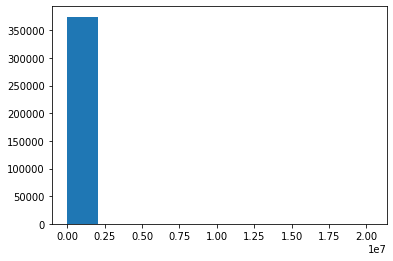

In [111]:
plt.hist(projects.pledged)

<AxesSubplot:xlabel='pledged'>

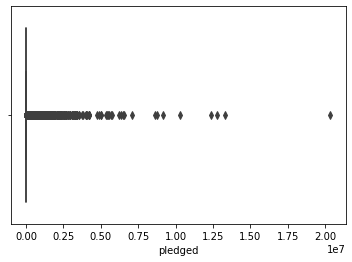

In [112]:
sns.boxplot(data=projects, x='pledged')

In [113]:
Q1 = np.quantile(projects.pledged, 0.25)
Q3 = np.quantile(projects.pledged, 0.75)
IQR = Q3 - Q1

In [114]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [115]:
projects_no_outlier = projects[(projects.pledged > lower_limit) & (projects.pledged < upper_limit)]

<AxesSubplot:xlabel='pledged'>

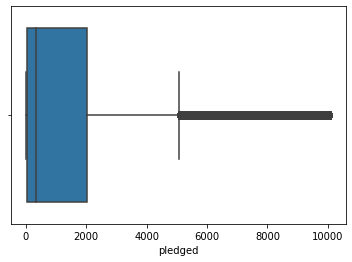

In [116]:
sns.boxplot(data=projects_no_outlier, x='pledged')

(array([208121.,  34534.,  22042.,  16180.,  10897.,  11015.,   7279.,
          5796.,   4711.,   3727.]),
 array([    0.   ,  1008.022,  2016.044,  3024.066,  4032.088,  5040.11 ,
         6048.132,  7056.154,  8064.176,  9072.198, 10080.22 ]),
 <BarContainer object of 10 artists>)

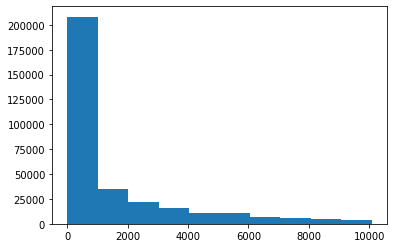

In [123]:
plt.hist(projects_no_outlier.pledged)

In [118]:
projects_no_outlier.shape

(324302, 11)

## Data Exploration

In [119]:
category_successful = projects_no_outlier.groupby(['category', 'is_successful']).ID.nunique().reset_index().pivot(columns='is_successful', index='category', values='ID').reset_index()
category_successful.columns = ['category', 'not_successful', 'successful']
category_successful.set_index('category', inplace=True)
category_successful

,not_successful,successful
category,,
Art,16310,10007
Comics,4841,4505
Crafts,6594,1901
Dance,1403,2078
Design,17770,4503
Fashion,16660,3499
Film & Video,37415,16439
Food,17961,3399
Games,21138,6308


In [120]:
chi2, pval, dof, expected = stats.chi2_contingency(category_successful)

In [121]:
chi2

23055.11276762704

In [122]:
pval

0.0